In [87]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import json
import cv2
import math
from copy import deepcopy

In [110]:
with open('accuracy_size.json', 'r') as f:
    data = json.load(f)

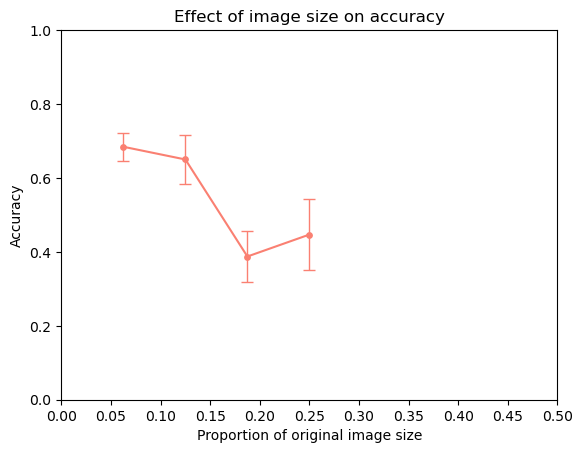

In [111]:
# plot line plot with dots and deviation
fig, ax = plt.subplots()
average = []
errors = []
for key in data:
    average.append(np.mean(data[key]))
    # standard error
    errors.append(np.std(data[key]) / math.sqrt(len(data[key])))
plt.plot(list([float(k) for k in data.keys()]), average, c="salmon")
plt.errorbar(list([float(k) for k in data.keys()]), average, yerr=errors, c="salmon", ecolor="salmon", ls="None", elinewidth=1, capsize=4)
plt.scatter(list([float(k) for k in data.keys()]), average, c="salmon", s=15)
plt.title("Effect of image size on accuracy")
plt.xlabel("Proportion of original image size")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.xlim([0, 0.5])
plt.xticks(np.arange(0, 0.51, 0.05))
plt.show()

In [100]:
fname = "./data_orange_peels/10/IMG_6317.JPG"

In [101]:
sample_image = cv2.resize(cv2.imread(fname, cv2.IMREAD_GRAYSCALE), (256, 256))

In [104]:
# get Sobel gradients
sobelx = cv2.Sobel(sample_image, cv2.CV_64F, 1, 0, ksize = 5)
sobely = cv2.Sobel(sample_image, cv2.CV_64F, 0, 1, ksize = 5)
sobel = cv2.addWeighted(cv2.convertScaleAbs(sobelx), 0.5, cv2.convertScaleAbs(sobely), 0.5, 0)

# apply Otsu thresholding and Sobel gradients
thresh = cv2.threshold(sobel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# dilate edges
edges = cv2.dilate(thresh, np.ones((5, 5), np.uint8))

# find contours
contours = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]

# find largest contour
cnt = sorted(contours, key=cv2.contourArea, reverse=True)[0]

cv2.drawContours(sample_image, [cnt], 0, (0, 0, 0), 5)

array([[210, 213, 213, ..., 194, 195, 197],
       [212, 213, 214, ..., 193, 195, 195],
       [213, 210, 210, ..., 193, 198, 194],
       ...,
       [221, 217, 216, ..., 206, 209, 203],
       [218, 216, 217, ..., 203, 205, 202],
       [216, 218, 219, ..., 203, 204, 203]], dtype=uint8)

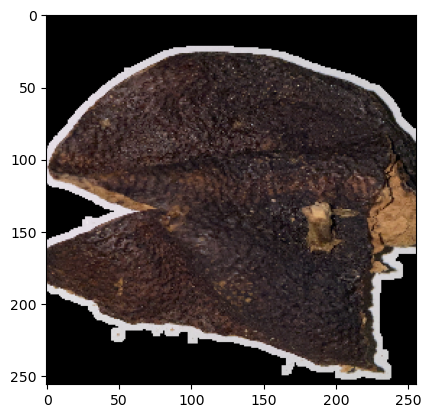

In [109]:
# load image and segment
image = cv2.imread(fname)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (256, 256))
mask = np.zeros(image.shape, dtype=np.uint8)
cv2.drawContours(mask, [cnt], 0, (255, 255, 255), -1)
masked_image = cv2.bitwise_and(image, mask)
plt.imshow(masked_image)